In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [149]:
data = pd.read_csv("Global_Space_Exploration_Dataset.csv")
print(data.head())

  Country  Year                              Mission Name Mission Type  \
0   China  2008          Sharable tertiary superstructure       Manned   
1   Japan  2018       Re-engineered composite flexibility       Manned   
2  Israel  2013       Reactive disintermediate projection       Manned   
3     UAE  2010  Grass-roots 6thgeneration implementation     Unmanned   
4   India  2006           Balanced discrete orchestration       Manned   

          Launch Site Satellite Type  Budget (in Billion $)  Success Rate (%)  \
0          Sheilatown  Communication                  16.20                90   
1        New Ericfurt  Communication                  29.04                99   
2    Port Kaitlynstad  Communication                  28.73                54   
3           Mariastad            Spy                  37.27                58   
4  North Jasonborough        Weather                  18.95                91   

      Technology Used Environmental Impact Collaborating Countries  

In [150]:
data.isnull().sum()

Country                    0
Year                       0
Mission Name               0
Mission Type               0
Launch Site                0
Satellite Type             0
Budget (in Billion $)      0
Success Rate (%)           0
Technology Used            0
Environmental Impact       0
Collaborating Countries    0
Duration (in Days)         0
dtype: int64

In [151]:
manned_count = (data["Mission Type"] == "Manned").sum()
unmanned_count = (data["Mission Type"] == "Unmanned").sum()

print(f"Manned: {manned_count}")
print(f"Unmanned: {unmanned_count}")

Manned: 1528
Unmanned: 1472


Text(0.5, 1.0, 'Budget vs Success rate')

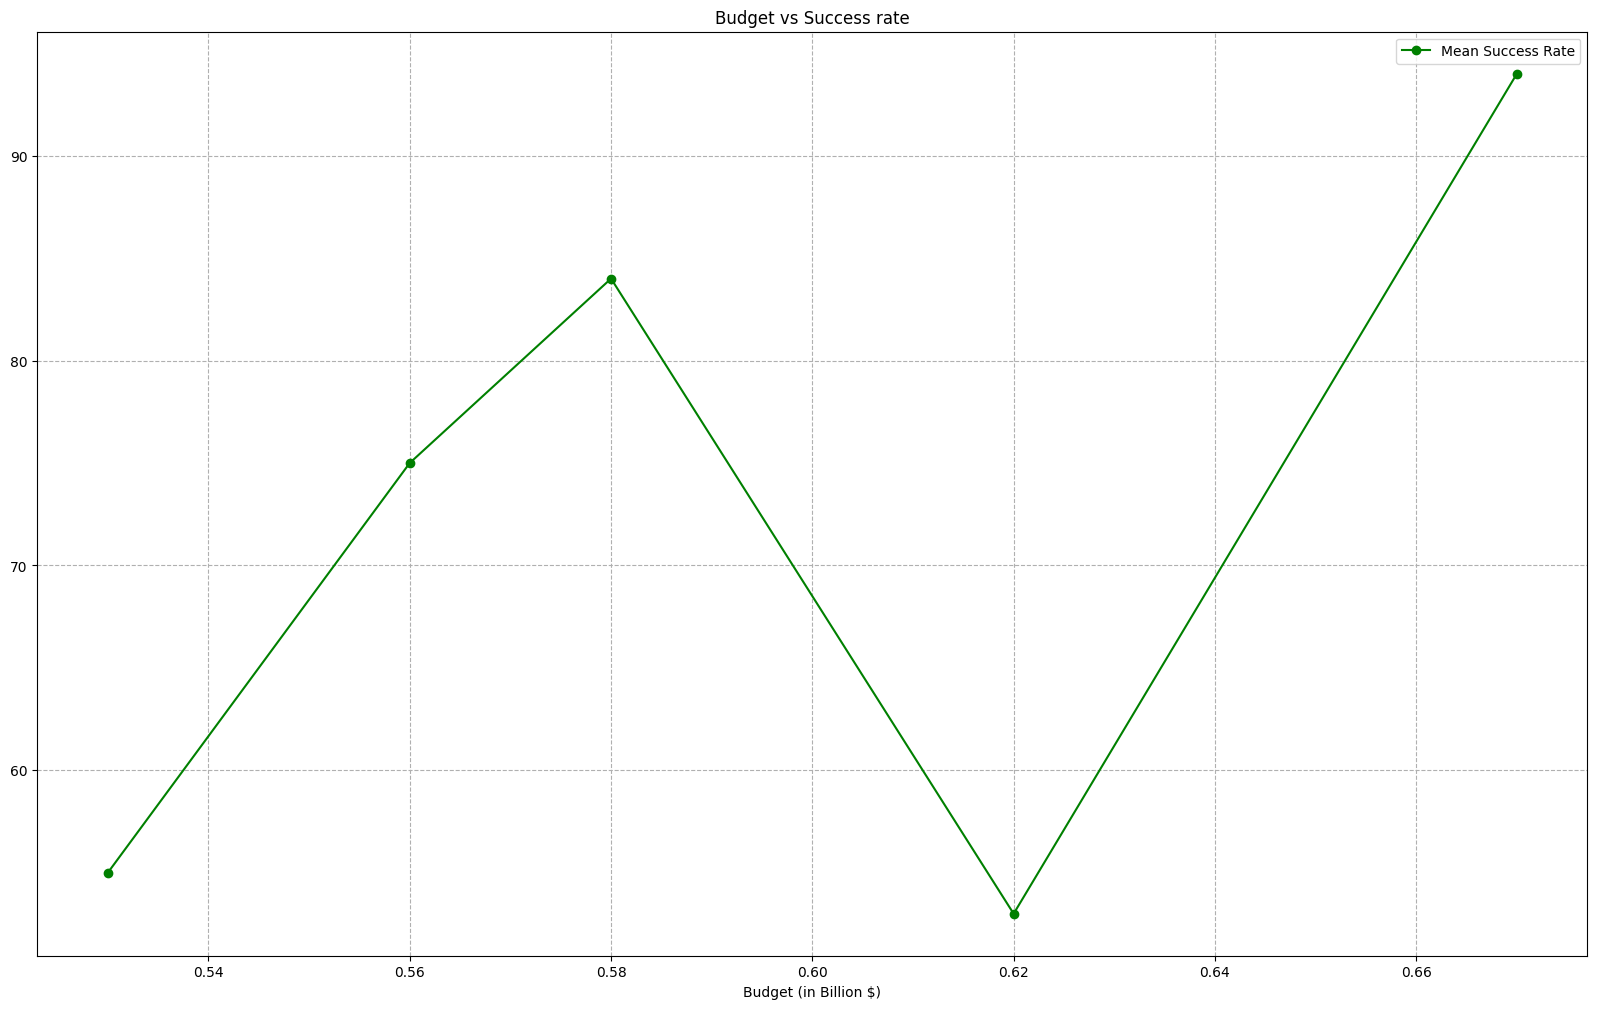

In [152]:
plt.figure(figsize=(20,12))
graph = data.groupby("Budget (in Billion $)")["Success Rate (%)"].mean().head()
graph.plot(kind='line', marker='o', label='Mean Success Rate', color="Green")
plt.legend()
plt.grid(True, linestyle='--')
plt.title("Budget vs Success rate")

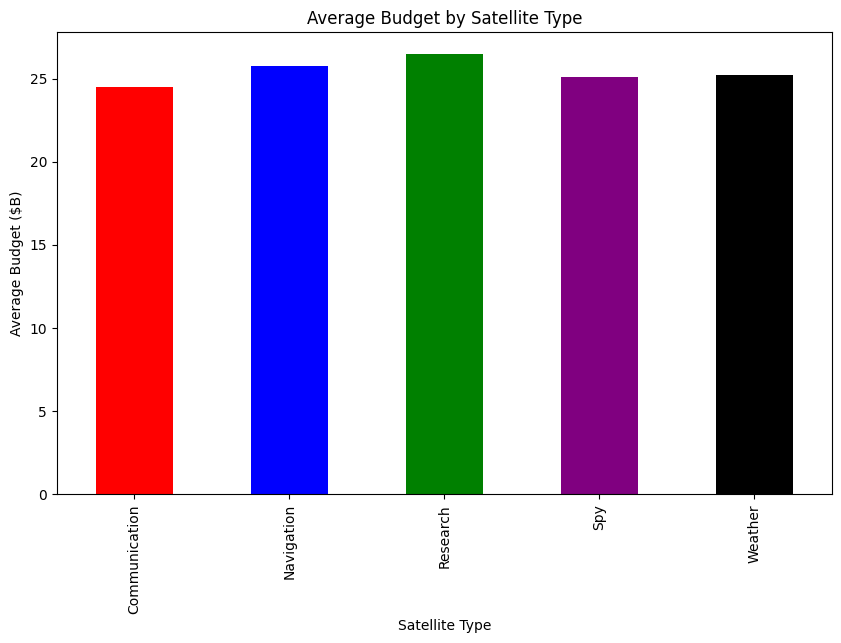

In [153]:
colors = ["red", "blue", "green", "purple", "black"]
avg_budget = data.groupby('Satellite Type')['Budget (in Billion $)'].mean()
avg_budget.plot(kind='bar', color=colors, figsize=(10, 6))
plt.ylabel('Average Budget ($B)')
plt.title('Average Budget by Satellite Type')
plt.show()

In [154]:
ct = pd.crosstab(data['Satellite Type'], data['Technology Used'])
print(ct)

Technology Used  AI Navigation  Nuclear Propulsion  Reusable Rocket  \
Satellite Type                                                        
Communication              114                 112              130   
Navigation                 122                  95              103   
Research                   121                 125              127   
Spy                        107                 111              119   
Weather                    145                 119              102   

Technology Used  Solar Propulsion  Traditional Rocket  
Satellite Type                                         
Communication                 117                 115  
Navigation                    112                 129  
Research                      127                 149  
Spy                           127                 121  
Weather                       115                 136  


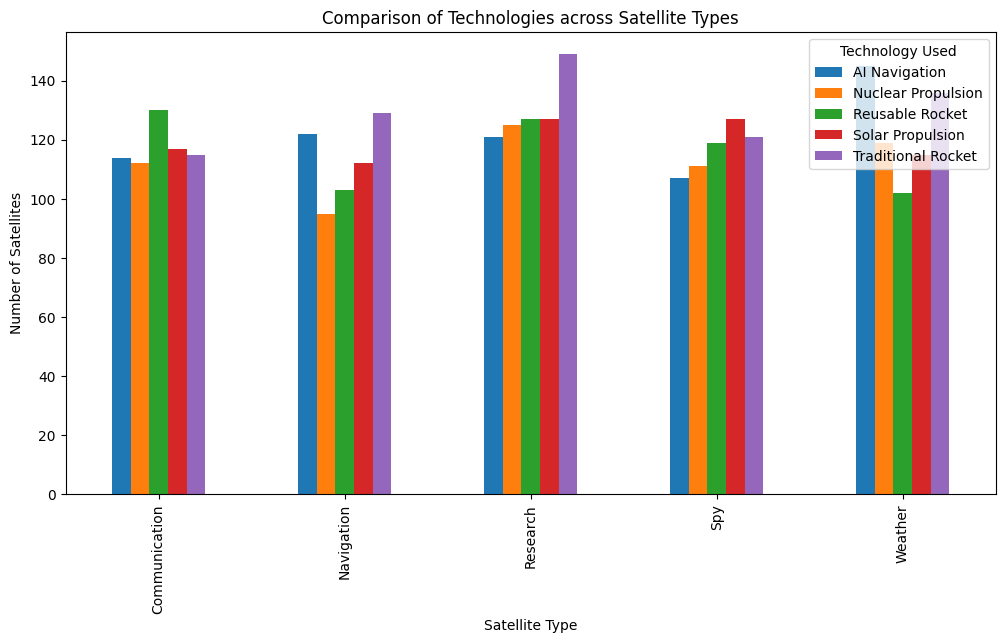

In [155]:
ct.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Comparison of Technologies across Satellite Types')
plt.ylabel('Number of Satellites')
plt.show()

In [156]:
fig = px.choropleth(data, 
                    locations="Country", 
                    locationmode="country names",
                    color="Success Rate (%)",
                    hover_name="Country", 
                    title="Launch Success Rate by Country")
fig.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_21612\342909408.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [157]:
fig = px.scatter_geo(data, 
                     locations="Country", 
                     locationmode="country names",
                     color="Country",
                     hover_name="Launch Site",
                     title="Global Launch Sites")
fig.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_21612\1177970655.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



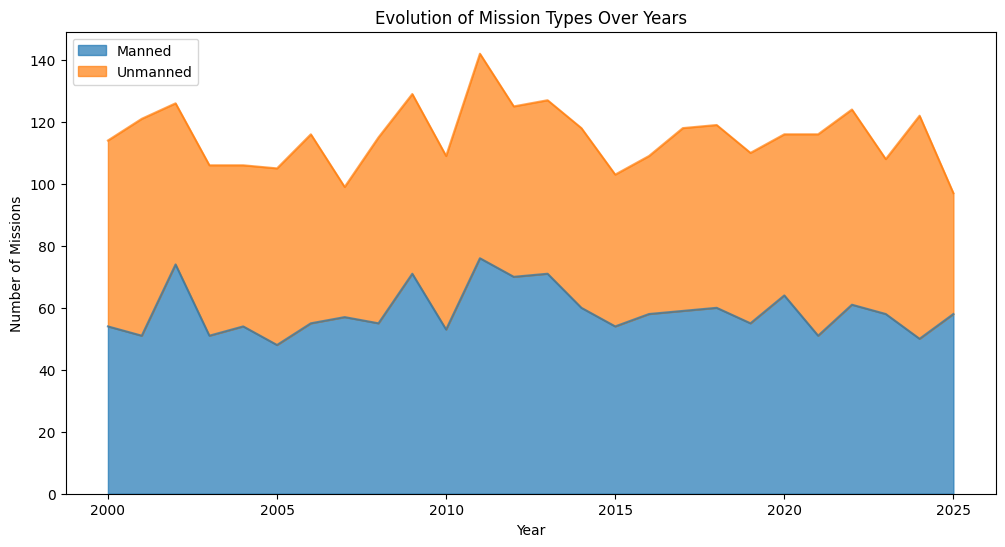

In [158]:
yearly_types = data.groupby(['Year', 'Mission Type']).size().unstack(fill_value=0)
yearly_types.plot(kind='area', stacked=True, figsize=(12, 6), alpha=0.7)
plt.title('Evolution of Mission Types Over Years')
plt.ylabel('Number of Missions')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.show()

In [159]:
fig = px.treemap(data, 
                 path=['Satellite Type', 'Mission Name'], 
                 values='Budget (in Billion $)',
                 color='Satellite Type',
                 title="Missions Grouped by Satellite Type")
fig.show()

In [160]:
ct1 = pd.crosstab(data['Technology Used'], data['Environmental Impact'])
print(ct1)


Environmental Impact  High  Low  Medium
Technology Used                        
AI Navigation          188  214     207
Nuclear Propulsion     196  185     181
Reusable Rocket        182  192     207
Solar Propulsion       178  212     208
Traditional Rocket     214  207     229


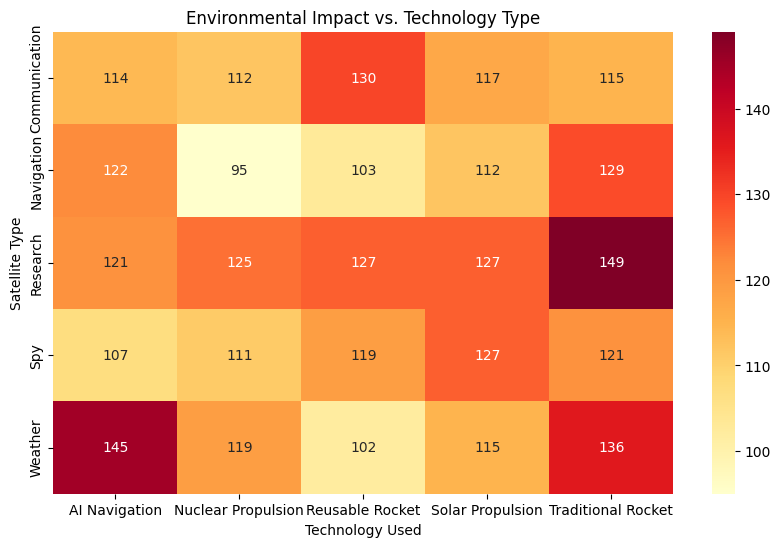

In [161]:
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap="YlOrRd", fmt='d')
plt.title("Environmental Impact vs. Technology Type")
plt.show()

In [162]:
X = pd.get_dummies(data[['Satellite Type']], drop_first=True)
y = data['Budget (in Billion $)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(f"Model Accuracy (R2 Score): {r2_score(y_test, y_pred):.4f}")

Model Accuracy (R2 Score): -0.0121


In [ ]:
# 1. Get the list of categories the model knows
# 'X' is the DataFrame you created with pd.get_dummies
all_columns = X.columns 
unique_types = data['Satellite Type'].unique()

print(f"Available Satellite Types: {list(unique_types)}")

# 2. Get user input
user_input = input("Enter the Satellite Type to predict budget: ")

if user_input in unique_types:
    # 3. Create a template row of zeros matching the model's training features
    # This creates a DataFrame with 1 row and all columns from X set to 0
    input_df = pd.DataFrame(0, index=[0], columns=all_columns)
    
    # 4. Set the specific column for the user's choice to 1
    # Note: pd.get_dummies adds a prefix, usually 'Satellite Type_'
    column_name = 'Satellite Type_' + user_input
    
    if column_name in all_columns:
        input_df[column_name] = 1
    # Note: If the column isn't found, it means it was the 'first' category 
    # that was dropped by 'drop_first=True'. In that case, leaving it as 
    # all zeros is the correct way to represent it!

    # 5. Predict
    prediction = regressor.predict(input_df)
    
    print(f"\n--- Prediction Result ---")
    print(f"Satellite Type: {user_input}")
    print(f"Estimated Budget: ${prediction[0]:.2f} Billion")
else:
    print("Error: Satellite Type not recognized. Please check for spelling/spaces.")

Available Satellite Types: ['Communication', 'Spy', 'Weather', 'Research', 'Navigation']

--- Prediction Result ---
Satellite Type: Spy
Estimated Budget: $25.44 Billion
